                                           statistic_project

### Loading libraries and data 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import f_regression
import numpy as np




In [20]:
data = pd.read_excel("/Users/mac/Desktop/statistics-labs/Data_source.xlsx")


In [21]:
data.head(5)


,Id,ethnicgp,gender,age,years,commit,satis,autonom,routine,attend,skill,prody,qual,absence,income
0,1,1,1,29.0,1.0,4.0,NaN,10,9,2,3,NaN,1,7.0,16.6
1,2,2,1,26.0,5.0,2.0,NaN,7,15,1,3,4.0,4,8.0,14.6
2,3,3,1,40.0,5.0,4.0,15.0,7,8,1,4,3.0,4,0.0,17.8
3,4,3,1,46.0,15.0,2.0,7.0,7,10,2,3,3.0,4,4.0,16.4
4,5,2,2,63.0,36.0,4.0,14.0,11,18,1,3,5.0,3,0.0,18.6


## Gender-barchart

###### Count the somma of each gender

In [22]:
gender_counts = data['gender'].value_counts()


###### plot the graph using matplotlib library

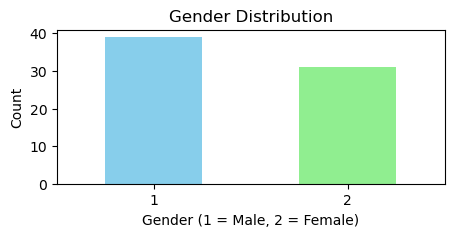

In [23]:

plt.figure(figsize=(5, 2))
gender_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Ethnic group

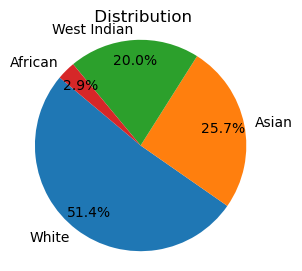

In [24]:
ethnic_counts = data['ethnicgp'].value_counts().sort_index()

# Mapping numeric codes to actual ethnic group names
ethnic_labels_mapping = {1: 'White', 2: 'Asian', 3: 'West Indian', 4: 'African', 5: 'Other'}
ethnic_labels = [ethnic_labels_mapping[ethnic] for ethnic in ethnic_counts.index]

# Create the pie chart with labels inside each slice
plt.figure(figsize=(3, 3))
plt.pie(ethnic_counts, labels=ethnic_labels, autopct='%1.1f%%', pctdistance=0.8, startangle=140)
plt.title(" Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## B)The five number summaries

In [25]:
age_summary = data['age'].describe(percentiles=[0.25, 0.5, 0.75])
min_age = age_summary['min']
q1_age = age_summary['25%']
median_age = age_summary['50%']
q3_age = age_summary['75%']
max_age = age_summary['max']

# Display the five number summary
age_summary_values = {
    'Min': min_age,
    'Q1 (25%)': q1_age,
    'Median': median_age,
    'Q3 (75%)': q3_age,
    'Max': max_age
}

In [26]:
print("Maxiumum=",max_age, "Minumium=", min_age, "Q1 (25%)= ", q1_age, "Median = ",median_age , " Q3(75%) =", q3_age, "Max=",max_age )

Maxiumum= 63.0 Minumium= 18.0 Q1 (25%)=  29.0 Median =  39.0  Q3(75%) = 50.0 Max= 63.0


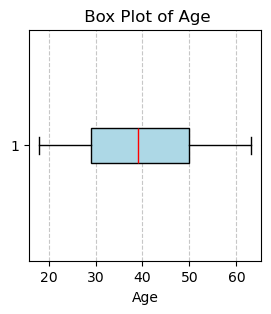

In [27]:
plt.figure(figsize=(3, 3))
plt.boxplot(
    [[age_summary['min'], age_summary['25%'], 
      age_summary['50%'], age_summary['75%'], 
      age_summary['max']]], 
    vert=False, patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# Set labels and titles
plt.title(" Box Plot of Age")
plt.xlabel('Age')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

 25% of the participants in the survey are younger than 29 years, half of the partcipants are younger than 39 years old and the other half are older than 39 years old
 The middle 50% of all participants are between 29 and 50 years old, no outliers, indicating a fairly even age distribution.

## C)Mean and standard deviation

In [28]:
mean_income = data['income'].mean()
std_income = data['income'].std()
print("the mean of the income is =", mean_income, "the standard deviation of the income is =",std_income)

the mean of the income is = 15.63823529411765 the standard deviation of the income is = 1.9958935014633157


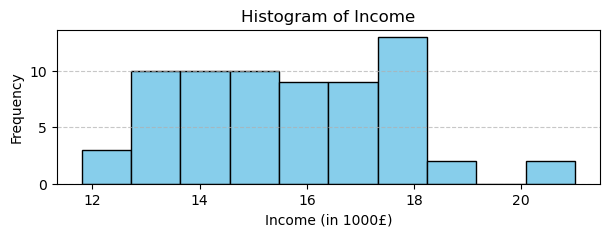

In [29]:
plt.figure(figsize=(7, 2))
plt.hist(data['income'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Income')
plt.xlabel('Income (in 1000£)')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

Mean annual income = £15.638 and the standard deviation = £1.995 ==> most individuals' incomes fall between £13,643 and £17,633.

Relationship between income and absence.

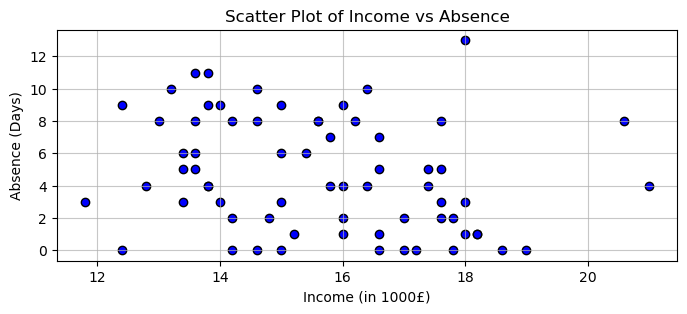

In [30]:
plt.figure(figsize=(8, 3))
plt.scatter(data['income'], data['absence'], color='blue', edgecolor='black')
plt.title('Scatter Plot of Income vs Absence')
plt.xlabel('Income (in 1000£)')
plt.ylabel('Absence (Days)')
plt.grid(True, linestyle='-', alpha=0.7)

# Show the scatter plot
plt.show()

=> it seems there is no clear trends between the two variables (Absence and income), there is no relationship between the two variables.

### The simple regression model where income is dependent variable and absence is independent variable.

## In this part we are going to use the library scikit-learn of pyhton. 

Check and drop the missing values :first we should Make sure there is no NaN value in both variables, once the data is clean we can run the regression model 

Next we find the regression model and the detrmination coefficient, for the linear regression we are goiung to use the linear regression function in the scikit learn learn library.


In [31]:

# Clean the data and removing NaN values
df_clean = data[['income', 'absence']].dropna()

# Define x and y 
X = df_clean[['absence']]  # Independent 
y = df_clean['income']     # Dependent 

# Create linear regression model using scikit-learn
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
intercept = model.intercept_
slope = model.coef_[0]

# Step 6: Predict income using absence
y_pred = model.predict(X)

# Calculate the R-squared 
r_squared = r2_score(y, y_pred)

# The results
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"The Linear regression model: y = {intercept:.3f} + {slope:.3f} * x")
print(f"R-squared (Determination Coefficient): {r_squared}")


Intercept: 16.325322949730566
Slope: -0.14312024802539305
The Linear regression model: y = 16.325 + -0.143 * x
R-squared (Determination Coefficient): 0.06243389452270087


Interpretation : β0 = 16,325 this means if there is no absense the predicted income would be £16,325.
β1 = -0.1431 this means for each day of absense the income decrease with 0.1431£.
R-squared: 0.06243 this explain the variability of income according to the variability of absense, in our case it is 62.43 % ==>62.43 % of the variance of the income is is explained by the absence; the remaining 37.57% is unexplained by the model ==>  suggest there is no big relationship between the 2 variables.

### Studying the multiple regression model with satis as dependent variable and commit, autonom, income,skill, rated quality, age, years as independent variables.

# a)

we will use scikit-learn as in 1.2 it is a python library that makes life easier when finding the multiple regression:
Lets define job sattisfaction(satis) as a dependant variable and  commit, autonom, income,skill, rated quality, age, years as independent variables :

In [32]:
# Clean the data by dropping rows with missing values in specific columns
df_clean = data[['satis', 'commit', 'autonom', 'income', 'skill', 'qual', 'age', 'years']].dropna()

# Define the independent variables (X) and the dependent variable (y)
X = df_clean[['commit', 'autonom', 'income', 'skill', 'qual', 'age', 'years']]
y = df_clean['satis']

# Add a constant to the independent variables (needed for statsmodels)
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  satis   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     32.72
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           3.00e-17
Time:                        22:55:56   Log-Likelihood:                -110.16
No. Observations:                  62   AIC:                             236.3
Df Residuals:                      54   BIC:                             253.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5545      1.776     -2.564      0.0

The variables with no significant impact are : Qual(P value = 0.156), age (P = 0.735) and Years (P=0.661) => their P values are much more higher than the conventional 0.05. 

### The variables among them that has NOT any significant impact on satis 

Here we just need to remove the non significant variables and and only use the rest of the variables.

In [33]:
# Assume df_clean is your DataFrame containing the dataset
X_simplified = df_clean[['commit', 'autonom', 'income', 'skill']] #independant
y = df_clean['satis']  # Dependent 

# Adding a constant for the intercept in statsmodels
X_simplified = sm.add_constant(X_simplified)

# The model
model_simplified = sm.OLS(y, X_simplified).fit()

# summary
print(model_simplified.summary())

                            OLS Regression Results                            
Dep. Variable:                  satis   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     57.43
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           2.41e-19
Time:                        22:55:57   Log-Likelihood:                -111.44
No. Observations:                  62   AIC:                             232.9
Df Residuals:                      57   BIC:                             243.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0364      1.578     -2.558      0.0

==>   Y
^
 =−4.0364+0.9689×commit+0.4296×autonom+0.4283×income+0.6012×skill //
The model suggest that significant variables like commitment, autonomy, income and skill they all positively impact job satistfaction: improvement in these areas are likely to enhance employee satisfaction.The model is well fit with a squared R of 80.1% 

### Confidence interval for job satisfaction


In [34]:
from scipy import stats

satis = data['satis'].dropna()

# Calculate the mean and standard error of the mean (SEM)
mean_satis = np.mean(satis)
sem_satis = stats.sem(satis)

# Get the confidence interval
confidence_interval = sm.stats.DescrStatsW(satis).tconfint_mean()

print(f"Mean job satisfaction: {mean_satis}")
print(f"95% Confidence Interval for Job Satisfaction: {confidence_interval}")

Mean job satisfaction: 10.838235294117647
95% Confidence Interval for Job Satisfaction: (10.038594941028705, 11.637875647206588)


==> This means that we are 95% sure that the  average satsifaction score lies between 10.0385 and 11.637

### Confidence interval for job satisfaction between men and women


In [35]:
# Job satis score for men and women
men_satis = data[data['gender'] == 1]['satis'].dropna()  
women_satis = data[data['gender'] == 2]['satis'].dropna()  

# Use CompareMeans to compute the confidence interval for the difference in means
cm = sm.stats.CompareMeans(sm.stats.DescrStatsW(men_satis), sm.stats.DescrStatsW(women_satis))
diff_conf_int = cm.tconfint_diff(usevar='unequal')  # Use Welch's method for unequal variances

# The confidence interval 
print(f"95% Confidence Interval for the difference in job satisfaction between genders: {diff_conf_int}")

95% Confidence Interval for the difference in job satisfaction between genders: (-1.381967817613968, 1.854504870796183)


==> Since the range include 0 than we can conclude that there is NO diffirence between job satis for men and job satis for women

### Using the Mann-Whitney-Wilcoxon test to see if there is any significance in skill between man and woman, and comparing the result with confidence interval for the difference

In [36]:
from scipy.stats import mannwhitneyu
#skill ratings
men_skill = data[data['gender'] == 1]['skill'].dropna()  # Skill ratings for men
women_skill = data[data['gender'] == 2]['skill'].dropna()  # Skill ratings for women

# Mann-Whitney-Wilcoxon test
stat, p_value = mannwhitneyu(men_skill, women_skill, alternative='two-sided')


print(f"Mann-Whitney U Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Mann-Whitney U Test Statistic: 733.0
P-Value: 0.1173277835474177


==> P value is greater than 0.05 it means there is no significant diffirence between in skills between men and women.

# Using the Kruskal-Wallis test to see if there is any significance in absence among ethnic group, and compare the result with One-Way ANOVA analysis.

In [37]:
from scipy.stats import kruskal, f_oneway


In [38]:
ethnic_groups = data['ethnicgp'].unique()  
absence_by_ethnic_group = [data[data['ethnicgp'] == group]['absence'].dropna() for group in ethnic_groups]

kruskal_stat, kruskal_p_value = kruskal(*absence_by_ethnic_group)

anova_stat, anova_p_value = f_oneway(*absence_by_ethnic_group)

print(f"Kruskal-Wallis Test Statistic: {kruskal_stat}, P-Value: {kruskal_p_value}")
print(f"One-Way ANOVA Test Statistic: {anova_stat}, P-Value: {anova_p_value}")

Kruskal-Wallis Test Statistic: 3.4113189455188184, P-Value: 0.3324471948921905
One-Way ANOVA Test Statistic: 1.1501204889169643, P-Value: 0.3356505991566349


Kruskal-Wallis : since P value is grater than 0.05 it suggest that there is no  diffirence in the median number of absences among diffirent ethnic groups.
Comparison between One-Way ANOVA and Kruskal-Wallis : Both tests resulter a p value > 0.05 ; no diffirences in absense between ethnic groups.
One-Way ANOVA assumes that the data is normally distributed 
==> the diffirence of absence between ethnic groups is not too significant. 

# Investigating if there is any significant relationship between income_class and skill.


In [39]:
from scipy.stats import chi2_contingency

Q1 = data['income'].quantile(0.25)
Q3 = data['income'].quantile(0.75)
Min = data['income'].min()
Max = data['income'].max()
conditions = [
    (data['income'] >= Min) & (data['income'] <= Q1),    # Low income: between Min and Q1
    (data['income'] > Q1) & (data['income'] <= Q3),      # Middle income: between Q1 and Q3
    (data['income'] > Q3) & (data['income'] <= Max)      # High income: between Q3 and Max
]

choices = ['Low Income', 'Middle Income', 'High Income']
data['income_class'] = np.select(conditions, choices)

# Step 4: Create a contingency table for 'income_class' and 'skill'
contingency_table = pd.crosstab(data['income_class'], data['skill'])

# Step 5: Perform the Chi-Square Test of Independence to see if there is a significant relationship
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 6: Display the contingency table and the Chi-Square test results
print("Contingency Table:")
print(contingency_table)
print(f"\nChi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

Contingency Table:
skill          1   2   3  4
income_class               
0              0   0   1  1
High Income    2   1   6  8
Low Income     3   7   4  3
Middle Income  9  10  10  5

Chi-Square Statistic: 13.045943867743176
P-Value: 0.16053834798877892


==> There is no great relationship between income class and skill since the P value is grater than 0.05